# Importing Dependencies and pre-trained Model

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Process Images and Load

In [3]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :] # Adds a new axis to the image tensor to create a batch dimension, making the image suitable for processing by models that expect input in batch form.
    return img

In [4]:
content_img = load_img('/content/drive/MyDrive/Neural Networks/neural-style-transfer/chapel.jpeg')
style_img = load_img('/content/drive/MyDrive/Neural Networks/neural-style-transfer/night_sky.jpeg')

# Visualize Output

In [ ]:
content_img.shape

TensorShape([1, 1280, 2048, 3])

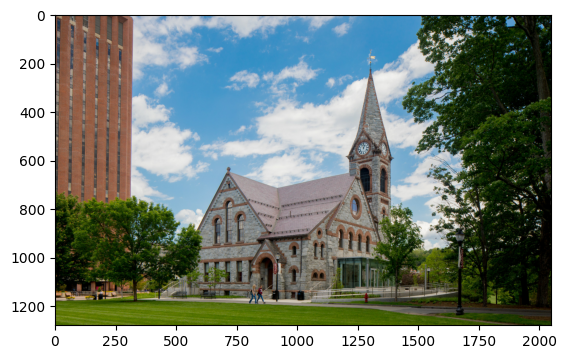

In [ ]:
plt.imshow(np.squeeze(content_img))
plt.show()

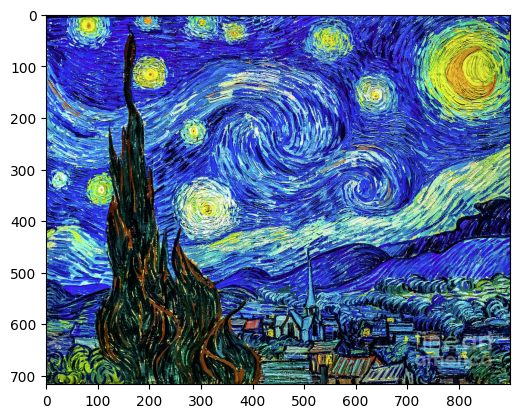

In [ ]:
plt.imshow(np.squeeze(style_img))
plt.show()

# Perform Neural Style Transfer

In [ ]:
stylized_image = model(tf.constant(content_img), tf.constant(style_img))[0]

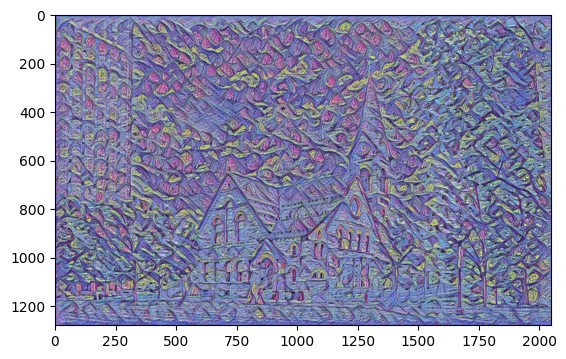

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))